# **Importando bibliotecas e a base de imagens**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

# **Funções**:
- Para um código mais simples e limpo.
- Como vi que haviam repetições nos códigos, optei por criar as funções abaixo:

In [44]:
def loss_and_accuracy(history_passado):
  fig, ax = plt.subplots(ncols=2,figsize=(12,4))
  ax[0].plot(history_passado.history['loss'],label='loss')
  ax[0].plot(history_passado.history['val_loss'], label='val_loss')
  ax[0].legend()
  ax[1].plot(history_passado.history['sparse_categorical_accuracy'],label='sparse_categorical_accuracy')
  ax[1].plot(history_passado.history['val_sparse_categorical_accuracy'], label='val_sparse_categorical_accuracy')
  ax[1].legend()
  plt.show()

In [45]:
def visualizar_matrix_confusao(x_teste, y_teste, modelo, amostra):
  prev = []
  for i in range(amostra):
    pr = modelo.predict(np.expand_dims(x_teste[i], axis=0), verbose=0)
    prev.append(pr.argmax())
  prev = np.array(prev)
  amostra = y_teste[:amostra]
  return confusion_matrix(amostra, prev)

In [46]:
def grafico_acertos_erros_modelo(modelo_passado, x_teste, y_teste):
  fig, axs = plt.subplots(4,5, figsize=(10,10))
  for i,ax in enumerate(axs.flat):
      ax.imshow(x_teste[i],cmap='gray')
      ax.axis('off')
      pred = modelo_passado.predict(np.expand_dims(x_teste[i], axis=0), verbose=0)
      num_classe = y_teste[i]
      ax.set_title(f'Item {y_teste[i]} - {classes[num_classe]}',pad=18, fontsize=10.5)
      ax.text(14,-3,f'Previsão: {pred.argmax()} - {pred.max():.2%}', va='center', ha='center',
              color='green' if pred.argmax() == y_teste[i] else 'red')
  plt.show()

# **Analisando a base:**

In [47]:
print("Dimensões do xtrain: ",xtrain.shape)
print("Dimensões do ytrain: ",ytrain.shape)
print("Dimensões do xtest: ",xtest.shape)
print("Dimensões do ytest: ",ytest.shape)

Dimensões do xtrain:  (60000, 28, 28)
Dimensões do ytrain:  (60000,)
Dimensões do xtest:  (10000, 28, 28)
Dimensões do ytest:  (10000,)


In [48]:
contagem_ytrain = tuple(zip(*np.unique(ytrain, return_counts=True)))
contagem_ytrain

((0, 6000),
 (1, 6000),
 (2, 6000),
 (3, 6000),
 (4, 6000),
 (5, 6000),
 (6, 6000),
 (7, 6000),
 (8, 6000),
 (9, 6000))

In [49]:
contagem_ytest = tuple(zip(*np.unique(ytrain, return_counts=True)))
contagem_ytest

((0, 6000),
 (1, 6000),
 (2, 6000),
 (3, 6000),
 (4, 6000),
 (5, 6000),
 (6, 6000),
 (7, 6000),
 (8, 6000),
 (9, 6000))

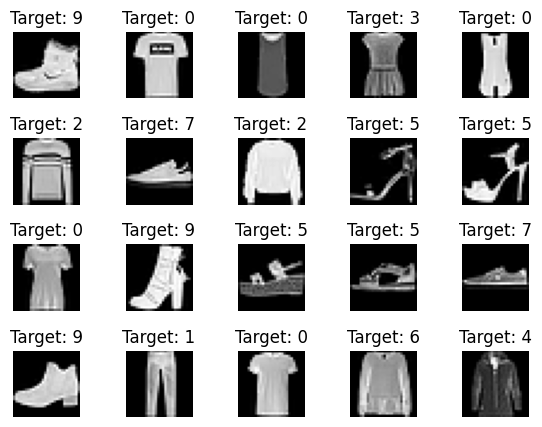

In [50]:
fig, axs = plt.subplots(4, 5, figsize=(7, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(xtrain[i], cmap="gray")
    ax.set_title(f"Target: {ytrain[i]}")
    ax.axis("off")
fig.subplots_adjust(hspace=0.6)
plt.show()

**Analisando a documentação temos os nomes das classes das imagens, representando o objeto da figura.**

In [51]:
classes = ['Camisetas/top', 'Calças', 'Suéteres', 'Vestidos', 'Casacos',
               'Sandálias', 'Camisas', 'Tênis', 'Mochilas', 'Botas']

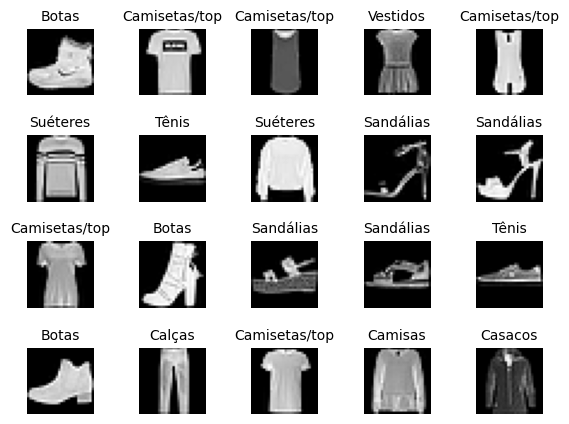

In [52]:
fig, axs = plt.subplots(4, 5, figsize=(7, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(xtrain[i], cmap="gray")
    ax.set_title(classes[ytrain[i]], fontsize=10)                               # Colocando como título o índice dentro da variável "classes", que é dado pelo ytrain[i]
    ax.axis("off")
fig.subplots_adjust(hspace=0.6)
plt.show()

In [53]:
xtrain_flatten = xtrain.reshape((xtrain.shape[0], -1))
df_treino = pd.DataFrame(data=xtrain_flatten, columns=[f'pixel_{i}' for i in range(xtrain_flatten.shape[1])])
df_treino['label'] = ytrain
df_treino.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


```
classes = ['Camisetas/top', 'Calças', 'Suéteres', 'Vestidos', 'Casacos',
               'Sandálias', 'Camisas', 'Tênis', 'Mochilas', 'Botas']
```



In [54]:
def classes_nomes(label):
  nome = classes[label]
  return nome

df_treino['Classe'] = df_treino['label'].apply(classes_nomes)
df_treino[['label','Classe']].head()

,label,Classe
0,9,Botas
1,0,Camisetas/top
2,0,Camisetas/top
3,3,Vestidos
4,0,Camisetas/top


In [55]:
df_camisetas_pixels = {'pixel':[],'min':[],'max':[],'mean':[],'std':[]}
df_camisetas = pd.DataFrame(df_camisetas_pixels)

df_calcas_pixels = {'pixel':[],'min':[],'max':[],'mean':[],'std':[]}
df_calcas = pd.DataFrame(df_calcas_pixels)

df_sueteres_pixels = {'pixel':[],'min':[],'max':[],'mean':[],'std':[]}
df_sueteres = pd.DataFrame(df_sueteres_pixels)

df_vestidos_pixels = {'pixel':[],'min':[],'max':[],'mean':[],'std':[]}
df_vestidos = pd.DataFrame(df_vestidos_pixels)

df_casacos_pixels = {'pixel':[],'min':[],'max':[],'mean':[],'std':[]}
df_casacos = pd.DataFrame(df_casacos_pixels)

df_sandalias_pixels = {'pixel':[],'min':[],'max':[],'mean':[],'std':[]}
df_sandalias = pd.DataFrame(df_sandalias_pixels)

df_tenis_pixels = {'pixel':[],'min':[],'max':[],'mean':[],'std':[]}
df_tenis = pd.DataFrame(df_tenis_pixels)

df_mochilas_pixels = {'pixel':[],'min':[],'max':[],'mean':[],'std':[]}
df_mochilas = pd.DataFrame(df_mochilas_pixels)

df_botas_pixels = {'pixel':[],'min':[],'max':[],'mean':[],'std':[]}
df_botas = pd.DataFrame(df_botas_pixels)

df_camisas_pixels = {'pixel':[],'min':[],'max':[],'mean':[],'std':[]}
df_camisas = pd.DataFrame(df_camisas_pixels)

for coluna in df_treino.columns:
  if coluna != 'Classe':
    abc = pd.DataFrame(df_treino.groupby('Classe')[coluna].agg(['mean','min','max','std'])).reset_index()

    df_camiseta = abc.loc[abc['Classe'] == 'Camisetas/top']
    df_camisetas_pixels['pixel'] = coluna
    df_camisetas_pixels['min'] = df_camiseta['min']
    df_camisetas_pixels['max'] = df_camiseta['max']
    df_camisetas_pixels['mean'] = df_camiseta['mean']
    df_camisetas_pixels['std'] = df_camiseta['std']
    nova_linha = pd.DataFrame(df_camisetas_pixels)
    df_camisetas = pd.concat([df_camisetas, nova_linha], ignore_index=True)


    df_calca = abc.loc[abc['Classe'] == 'Calças']
    df_calcas_pixels['pixel'] = coluna
    df_calcas_pixels['min'] = df_calca['min']
    df_calcas_pixels['max'] = df_calca['max']
    df_calcas_pixels['mean'] = df_calca['mean']
    df_calcas_pixels['std'] = df_calca['std']
    nova_linha = pd.DataFrame(df_calcas_pixels)
    df_calcas = pd.concat([df_calcas, nova_linha], ignore_index=True)


    df_sueter = abc.loc[abc['Classe'] == 'Suéteres']
    df_sueteres_pixels['pixel'] = coluna
    df_sueteres_pixels['min'] = df_sueter['min']
    df_sueteres_pixels['max'] = df_sueter['max']
    df_sueteres_pixels['mean'] = df_sueter['mean']
    df_sueteres_pixels['std'] = df_sueter['std']
    nova_linha = pd.DataFrame(df_sueteres_pixels)
    df_sueteres = pd.concat([df_sueteres, nova_linha], ignore_index=True)


    df_casaco = abc.loc[abc['Classe'] == 'Casacos']
    df_casacos_pixels['pixel'] = coluna
    df_casacos_pixels['min'] = df_casaco['min']
    df_casacos_pixels['max'] = df_casaco['max']
    df_casacos_pixels['mean'] = df_casaco['mean']
    df_casacos_pixels['std'] = df_casaco['std']
    nova_linha = pd.DataFrame(df_casacos_pixels)
    df_casacos = pd.concat([df_casacos, nova_linha], ignore_index=True)


    df_vestido = abc.loc[abc['Classe'] == 'Vestidos']
    df_vestidos_pixels['pixel'] = coluna
    df_vestidos_pixels['min'] = df_vestido['min']
    df_vestidos_pixels['max'] = df_vestido['max']
    df_vestidos_pixels['mean'] = df_vestido['mean']
    df_vestidos_pixels['std'] = df_vestido['std']
    nova_linha = pd.DataFrame(df_vestidos_pixels)
    df_vestidos = pd.concat([df_vestidos, nova_linha], ignore_index=True)


    df_sandalia = abc.loc[abc['Classe'] == 'Sandálias']
    df_sandalias_pixels['pixel'] = coluna
    df_sandalias_pixels['min'] = df_sandalia['min']
    df_sandalias_pixels['max'] = df_sandalia['max']
    df_sandalias_pixels['mean'] = df_sandalia['mean']
    df_sandalias_pixels['std'] = df_sandalia['std']
    nova_linha = pd.DataFrame(df_sandalias_pixels)
    df_sandalias = pd.concat([df_sandalias, nova_linha], ignore_index=True)


    df_tenis_b = abc.loc[abc['Classe'] == 'Tênis']
    df_tenis_pixels['pixel'] = coluna
    df_tenis_pixels['min'] = df_tenis_b['min']
    df_tenis_pixels['max'] = df_tenis_b['max']
    df_tenis_pixels['mean'] = df_tenis_b['mean']
    df_tenis_pixels['std'] = df_tenis_b['std']
    nova_linha = pd.DataFrame(df_tenis_pixels)
    df_tenis = pd.concat([df_tenis, nova_linha], ignore_index=True)


    df_mochila = abc.loc[abc['Classe'] == 'Mochilas']
    df_mochilas_pixels['pixel'] = coluna
    df_mochilas_pixels['min'] = df_mochila['min']
    df_mochilas_pixels['max'] = df_mochila['max']
    df_mochilas_pixels['mean'] = df_mochila['mean']
    df_mochilas_pixels['std'] = df_mochila['std']
    nova_linha = pd.DataFrame(df_mochilas_pixels)
    df_mochilas = pd.concat([df_mochilas, nova_linha], ignore_index=True)


    df_bota = abc.loc[abc['Classe'] == 'Botas']
    df_botas_pixels['pixel'] = coluna
    df_botas_pixels['min'] = df_bota['min']
    df_botas_pixels['max'] = df_bota['max']
    df_botas_pixels['mean'] = df_bota['mean']
    df_botas_pixels['std'] = df_bota['std']
    nova_linha = pd.DataFrame(df_botas_pixels)
    df_botas = pd.concat([df_botas, nova_linha], ignore_index=True)


    df_camisa = abc.loc[abc['Classe'] == 'Botas']
    df_camisas_pixels['pixel'] = coluna
    df_camisas_pixels['min'] = df_camisa['min']
    df_camisas_pixels['max'] = df_camisa['max']
    df_camisas_pixels['mean'] = df_camisa['mean']
    df_camisas_pixels['std'] = df_camisa['std']
    nova_linha = pd.DataFrame(df_camisas_pixels)
    df_camisas = pd.concat([df_camisas, nova_linha], ignore_index=True)

# **Análises com números:**

In [56]:
bases = [df_camisetas, df_calcas, df_sueteres, df_vestidos, df_casacos, df_sandalias, df_camisas, df_tenis, df_mochilas, df_botas]

for i,base in enumerate(bases):
  print(f'Na base {classes[i]} temos essa média de valor de pixels:')
  print(round(base['mean'].mean(),2))
  print(' ')


Na base Camisetas/top temos essa média de valor de pixels:
82.92
 
Na base Calças temos essa média de valor de pixels:
56.77
 
Na base Suéteres temos essa média de valor de pixels:
95.94
 
Na base Vestidos temos essa média de valor de pixels:
65.94
 
Na base Casacos temos essa média de valor de pixels:
98.14
 
Na base Sandálias temos essa média de valor de pixels:
34.83
 
Na base Camisas temos essa média de valor de pixels:
76.72
 
Na base Tênis temos essa média de valor de pixels:
42.72
 
Na base Mochilas temos essa média de valor de pixels:
90.05
 
Na base Botas temos essa média de valor de pixels:
76.72
 


Analisando os resultados acima, podemos ver que calçados costumam pegar menos pixels em média. Porém, isso não pode ser o fator determinando de algo, é apenas uma observação.

A seguir, veremos mais dados relacionados.

### **Explicação sobre os códigos abaixo**
- As imagens são 28x28
- No Dataframe há 784 linhas, ou seja 28x28
- Esses pixel foram registrados na base em sequencia, como se fossemos colocando 28 linhas em baixo de 28 linhas, até totalizar as 784
- Ou seja, se fizermos contas de 28 em 28, conseguimos pegar os pixels das bordas da imagem, da parte de baixo, de cima e assim por diante
- Isso é interessante para analisar algumas características das classes de imagens



Importante ressaltar que isso pode sim ajudar em entender os modelos, porém não é apenas isso. Por exemplo: No caso dos calçados a grande maioria dos pixels de cima estão próximos de 0. Porém e se o modelo estiver em produção e receber uma imagem na qual a imagem do calçado estiver mais acima? Ele classificará corretamente? Por isso mais tarde utilizarei modelos de Deep Learning, explorando recursos que irão nos ajudar.

### **Pixels das partes do meio para baixo das imagens**

In [57]:
numeros1 = np.linspace(28,784,28)
intervalo1 = []
intervalo2 = []

for numero in numeros1:
  intervalo1.append(int(numero - 14))
  intervalo2.append(int(numero))

for a,base in enumerate(bases):
  print(' ')
  print(' ')
  print(' ')
  print('Base: ',classes[a])
  print(' ')
  for i in range(28):
    print(f"Pixels: {intervalo1[0+i]} até {intervalo2[0+i]-1} ----- Média dos pixels: ", round(base.iloc[intervalo1[0+i]:intervalo2[0+i]]['mean'].mean(),1))

 
 
 
Base:  Camisetas/top
 
Pixels: 14 até 27 ----- Média dos pixels:  24.7
Pixels: 42 até 55 ----- Média dos pixels:  76.1
Pixels: 70 até 83 ----- Média dos pixels:  88.8
Pixels: 98 até 111 ----- Média dos pixels:  95.2
Pixels: 126 até 139 ----- Média dos pixels:  100.0
Pixels: 154 até 167 ----- Média dos pixels:  103.1
Pixels: 182 até 195 ----- Média dos pixels:  105.8
Pixels: 210 até 223 ----- Média dos pixels:  108.1
Pixels: 238 até 251 ----- Média dos pixels:  109.8
Pixels: 266 até 279 ----- Média dos pixels:  109.3
Pixels: 294 até 307 ----- Média dos pixels:  103.3
Pixels: 322 até 335 ----- Média dos pixels:  91.6
Pixels: 350 até 363 ----- Média dos pixels:  82.7
Pixels: 378 até 391 ----- Média dos pixels:  79.2
Pixels: 406 até 419 ----- Média dos pixels:  77.9
Pixels: 434 até 447 ----- Média dos pixels:  78.0
Pixels: 462 até 475 ----- Média dos pixels:  77.9
Pixels: 490 até 503 ----- Média dos pixels:  78.6
Pixels: 518 até 531 ----- Média dos pixels:  79.3
Pixels: 546 até 559 -

### **Pixels das partes do meio para cima das imagens**

In [58]:
numeros1 = np.linspace(28,784,28)
intervalo3 = []
intervalo4 = []

for numero in numeros1:
  intervalo3.append(int(numero - 28))
  intervalo4.append(int(numero-14))

for a,base in enumerate(bases):
  print(' ')
  print(' ')
  print(' ')
  print('Base: ',classes[a])
  print(' ')

  for i in range(28):
    print(f"Pixels: {intervalo3[0+i]} até {intervalo4[0+i]-1} ----- Média dos pixels: ", round(base.iloc[intervalo3[0+i]:intervalo4[0+i]]['mean'].mean(),1))

 
 
 
Base:  Camisetas/top
 
Pixels: 0 até 13 ----- Média dos pixels:  22.0
Pixels: 28 até 41 ----- Média dos pixels:  69.0
Pixels: 56 até 69 ----- Média dos pixels:  82.9
Pixels: 84 até 97 ----- Média dos pixels:  90.3
Pixels: 112 até 125 ----- Média dos pixels:  95.3
Pixels: 140 até 153 ----- Média dos pixels:  98.9
Pixels: 168 até 181 ----- Média dos pixels:  102.1
Pixels: 196 até 209 ----- Média dos pixels:  105.0
Pixels: 224 até 237 ----- Média dos pixels:  106.8
Pixels: 252 até 265 ----- Média dos pixels:  106.5
Pixels: 280 até 293 ----- Média dos pixels:  100.0
Pixels: 308 até 321 ----- Média dos pixels:  88.3
Pixels: 336 até 349 ----- Média dos pixels:  79.1
Pixels: 364 até 377 ----- Média dos pixels:  75.5
Pixels: 392 até 405 ----- Média dos pixels:  74.1
Pixels: 420 até 433 ----- Média dos pixels:  74.0
Pixels: 448 até 461 ----- Média dos pixels:  74.0
Pixels: 476 até 489 ----- Média dos pixels:  74.3
Pixels: 504 até 517 ----- Média dos pixels:  75.0
Pixels: 532 até 545 -----

# **Criando o primeiro modelo de Redes Neurais**
- Obs: A explicações do passo a passo da criação do modelo estão nesse módulo
### **Características:**
- Modelo **simples**.
- Rescaling feito fora do modelo.
- Apenas **uma camada oculta**
- **Sem camadas de pré processamento.**


**Importando a base e definindo o treino e teste:**

In [59]:
fashion_mnist = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

**Rescaling:**

In [60]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

**Criação do modelo:**

In [61]:
modelo1 = keras.models.Sequential()
modelo1.add(keras.layers.InputLayer(input_shape=(28,28)))                       # Camada de entrada
modelo1.add(keras.layers.Flatten())                                             # Alternado dimensões
modelo1.add(keras.layers.Dense(256, activation='relu'))                         # Camada oculta
modelo1.add(keras.layers.Dense(10, activation='softmax'))                       # Camada de saída
modelo1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Definindo otimizador, função de custo, métrica e compilando o modelo:**

In [62]:
otimizador = keras.optimizers.Adam()
funcao_custo = keras.losses.SparseCategoricalCrossentropy()
metrica = keras.metrics.SparseCategoricalAccuracy()

modelo1.compile(optimizer=otimizador, loss=funcao_custo, metrics=[metrica])

- **Criando o EarlyStop, definindo critérios como "patience":**
- **Fazendo o treinamento do modelo**

In [63]:
parada_antecipada = keras.callbacks.EarlyStopping(
    patience=5,
    verbose=1,
    min_delta=1E-4
)

history = modelo1.fit(
    xtrain,
    ytrain,
    epochs=200,
    batch_size=256,
    validation_split=0.2,
    callbacks=[parada_antecipada],
)

Epoch 1/200
188/188 [==============================] - 3s 10ms/step - loss: 0.6020 - sparse_categorical_accuracy: 0.7955 - val_loss: 0.4510 - val_sparse_categorical_accuracy: 0.8450
Epoch 2/200
188/188 [==============================] - 2s 10ms/step - loss: 0.4143 - sparse_categorical_accuracy: 0.8565 - val_loss: 0.3945 - val_sparse_categorical_accuracy: 0.8643
Epoch 3/200
188/188 [==============================] - 3s 13ms/step - loss: 0.3758 - sparse_categorical_accuracy: 0.8671 - val_loss: 0.3875 - val_sparse_categorical_accuracy: 0.8608
Epoch 4/200
188/188 [==============================] - 2s 10ms/step - loss: 0.3498 - sparse_categorical_accuracy: 0.8758 - val_loss: 0.3582 - val_sparse_categorical_accuracy: 0.8719
Epoch 5/200
188/188 [==============================] - 2s 9ms/step - loss: 0.3283 - sparse_categorical_accuracy: 0.8821 - val_loss: 0.3552 - val_sparse_categorical_accuracy: 0.8758
Epoch 6/200
188/188 [==============================] - 2s 9ms/step - loss: 0.3097 - sparse_

**Evaluate do modelo:**

In [64]:
modelo1.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3463 - sparse_categorical_accuracy: 0.8829


[0.34626489877700806, 0.8828999996185303]

**Visualizando a perda e acurácia nos dados de treino e validação:**

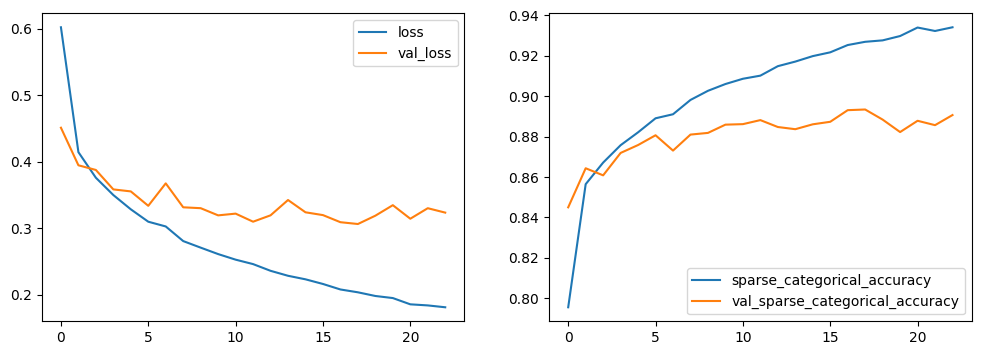

In [65]:
loss_and_accuracy(history)

Analisando o gráfico acima, vemos um caso clássico de "overfitting", ou seja, o gráfico basicamente "decorou" os dados, tendo assim, uma má generalização.

- Obs: Atenção também na quantidade de ruídos e variações nas linhas dos dados de teste

**Visualizando resultados dos 20 primeiros valores da base de treino:**
- Obs: Função criada no módulo "Funções".

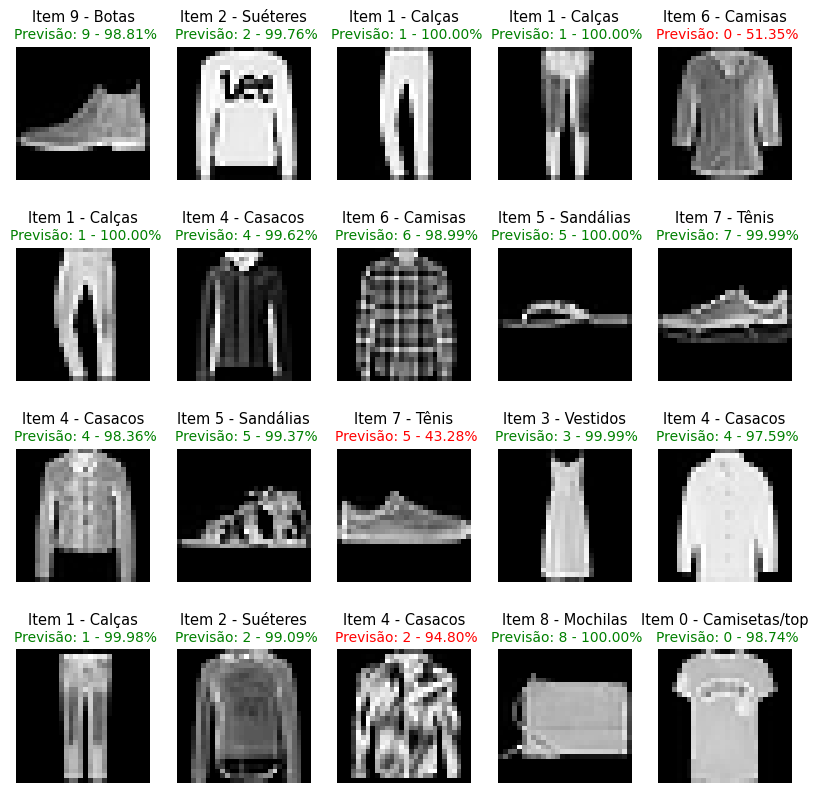

In [66]:
grafico_acertos_erros_modelo(modelo1, xtest, ytest)

**Utilizando a Matrix de Confusão para análisar os acertos do modelo**
- Obs: Função criada no módulo "Funções".
- Parâmetros: x_teste, y_teste, modelo, amostras.

In [67]:
visualizar_matrix_confusao(xtest,ytest,modelo1,1000)

array([[ 89,   1,   3,   0,   0,   0,  13,   0,   1,   0],
       [  0, 103,   0,   2,   0,   0,   0,   0,   0,   0],
       [  2,   0,  86,   2,  12,   0,   9,   0,   0,   0],
       [  4,   0,   2,  81,   3,   0,   3,   0,   0,   0],
       [  0,   0,   5,   4, 104,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,  85,   0,   2,   0,   0],
       [  6,   0,   6,   2,  15,   0,  68,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  93,   0,   1],
       [  2,   0,   3,   0,   0,   0,   0,   0,  90,   0],
       [  0,   0,   0,   0,   0,   1,   0,   5,   0,  89]])

# **Criando o segundo modelo de Redes Neurais**
### **Características:**
- Modelo **mediano**
- **Rescaling** feito **dentro** do modelo
- Rede Neural **CNN**
- **Mais camadas ocultas**
- **Sem camadas** de processamento

In [70]:
fashion_mnist = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

In [71]:
modelo2 = keras.models.Sequential()                                             #
modelo2.add(keras.layers.InputLayer(input_shape=(28,28,1)))                     #
modelo2.add(keras.layers.Rescaling(scale=1./255))                               #
modelo2.add(keras.layers.Conv2D(64,(3,3), activation='relu'))                   #
modelo2.add(keras.layers.Conv2D(64,(3,3), activation='relu'))                   #
modelo2.add(keras.layers.Conv2D(64,(3,3), activation='relu'))                   #
modelo2.add(keras.layers.Flatten())                                             #
modelo2.add(keras.layers.Dense(10, activation='softmax'))                       #
modelo2.summary()                                                               #

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 30976)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                309770    
                                                                 
Total params: 384266 (1.47 MB)
Trainable params: 38426

In [72]:
optimizer = keras.optimizers.Adam(learning_rate=1E-3)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

modelo2.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [73]:
early_stop = keras.callbacks.EarlyStopping(patience=5, verbose=1, min_delta=1E-4 )
history2 = modelo2.fit(xtrain, ytrain, epochs=200, batch_size=256, validation_split=0.2, callbacks=[early_stop])

Epoch 1/200
188/188 [==============================] - 283s 1s/step - loss: 0.5266 - sparse_categorical_accuracy: 0.8141 - val_loss: 0.3616 - val_sparse_categorical_accuracy: 0.8714
Epoch 2/200
188/188 [==============================] - 280s 1s/step - loss: 0.3161 - sparse_categorical_accuracy: 0.8883 - val_loss: 0.2915 - val_sparse_categorical_accuracy: 0.8972
Epoch 3/200
188/188 [==============================] - 289s 2s/step - loss: 0.2652 - sparse_categorical_accuracy: 0.9051 - val_loss: 0.2730 - val_sparse_categorical_accuracy: 0.9031
Epoch 4/200
188/188 [==============================] - 284s 2s/step - loss: 0.2272 - sparse_categorical_accuracy: 0.9174 - val_loss: 0.2540 - val_sparse_categorical_accuracy: 0.9092
Epoch 5/200
188/188 [==============================] - 282s 1s/step - loss: 0.1992 - sparse_categorical_accuracy: 0.9284 - val_loss: 0.2508 - val_sparse_categorical_accuracy: 0.9122
Epoch 6/200
 23/188 [==>...........................] - ETA: 3:56 - loss: 0.1742 - sparse_c

KeyboardInterrupt: 

In [ ]:
modelo2.evaluate(xtest, ytest)

Tivemos um começo de overfitting, como podemos ver no gráfico abaixo:

In [ ]:
loss_and_accuracy(history2)

In [ ]:
grafico_acertos_erros_modelo(modelo2, xtest, ytest)

In [ ]:
visualizar_matrix_confusao(xtest,ytest,modelo2,1000)

# **Criando o terceiro modelo de Redes Neurais**
### **Características:**
- Modelo **melhorado**
- **Rescaling dentro** do modelo
- **Pré processamento**
- **Dropout**
- Modelo **Conv2D**
- **Estratégias** nas camadas

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

In [ ]:
modelo3 = keras.models.Sequential()
modelo3.add(keras.layers.InputLayer(input_shape=(28,28,1)))
modelo3.add(keras.layers.Rescaling(scale=1./255))

modelo3.add(keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1))
modelo3.add(keras.layers.RandomZoom(0.1))
modelo3.add(keras.layers.RandomContrast(0.1))

modelo3.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
modelo3.add(keras.layers.Conv2D(256,(3,3), activation='relu'))
modelo3.add(keras.layers.MaxPooling2D())
modelo3.add(keras.layers.Dropout(0.2))
modelo3.add(keras.layers.Conv2D(512,(3,3), activation='relu'))
modelo3.add(keras.layers.MaxPooling2D())
modelo3.add(keras.layers.Dropout(0.2))

modelo3.add(keras.layers.Flatten())
modelo3.add(keras.layers.Dense(10, activation='softmax'))
modelo3.summary()

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1E-3)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

modelo3.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, verbose=1, restore_best_weights=True )
history3 = modelo3.fit(xtrain, ytrain, epochs=50, batch_size=512, validation_split=0.10, callbacks=[early_stop])

In [ ]:
modelo3.evaluate(xtest, ytest)

In [ ]:
loss_and_accuracy(history3)

In [ ]:
grafico_acertos_erros_modelo(modelo3, xtest, ytest)

O modelo conseguiu prever corretamente todas as imagens acima!

In [ ]:
visualizar_matrix_confusao(xtest,ytest,modelo3,1000)